# **Predicting Heart Disease: A Classification Analysis**

*Alvin de Vera, Peter Li, Vincent Luong, Wuyang Ren*

## **Introduction**

Our aim in data analysis is to build a classification model with high accuracy that can predict and classify whether a patient has heart disease. Using the re-processed data Cleveland Heart Disease from the UCI database, we will first observe the relationships between factors, such as age, cholesterol levels, and resting heart rate, with those that test positive for heart diseases. We will then use the strongest relationships to build our classification model.

## **Preliminary exploratory data analysis**


In [2]:
library(tidyverse)
library(repr)
library(rvest)
library(readxl)
library(tidymodels)

### Reading data from the web

In [5]:
#Preliminary exploratory data analysis (Wayne):

url <- "https://raw.githubusercontent.com/aChipmunka/dsci100_2023s1_group21/main/project/data/heart_cleveland.csv"
cleveland_data <- read_csv(url)|>
                  mutate(condition = as_factor (condition)) 
head(cleveland_data)




Rows: 297 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
64,1,0,170,227,0,2,155,0,0.6,1,0,2,0


This data is in tidy format. `condition` has been changed to a `factor`, as it is a categorical variable indicating the presence (condition = 1) and absence (condition = 0) of the heart disease. 

### Table

In [15]:
#Spliting the data into training and testing set
set.seed(2023)

cleveland_split <- initial_split(cleveland_data, prop = 0.75, strata = condition)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

#Creating a summary table
table_1 <- cleveland_train|>
         group_by (condition)|>
         summarize(average_age = mean(age), average_cholestoral = mean(chol))
table_1

age_disease_data <- cleveland_train|>
                    group_by(age)|>
                    filter(condition == 1)|>
                    summarize(count = n())

cholestoral_disease_data <- cleveland_train|>
                    group_by(chol)|>
                    filter(condition == 1)|>
                    summarize(count = n())


condition,average_age,average_cholestoral
<fct>,<dbl>,<dbl>
0,51.98333,243.0667
1,56.63725,251.1667


This table shows that people with heart disease have a higher average age and cholesterol level. Therefore, age and cholesterol may be two variables that can help predict heart disease. 

### Visualization

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



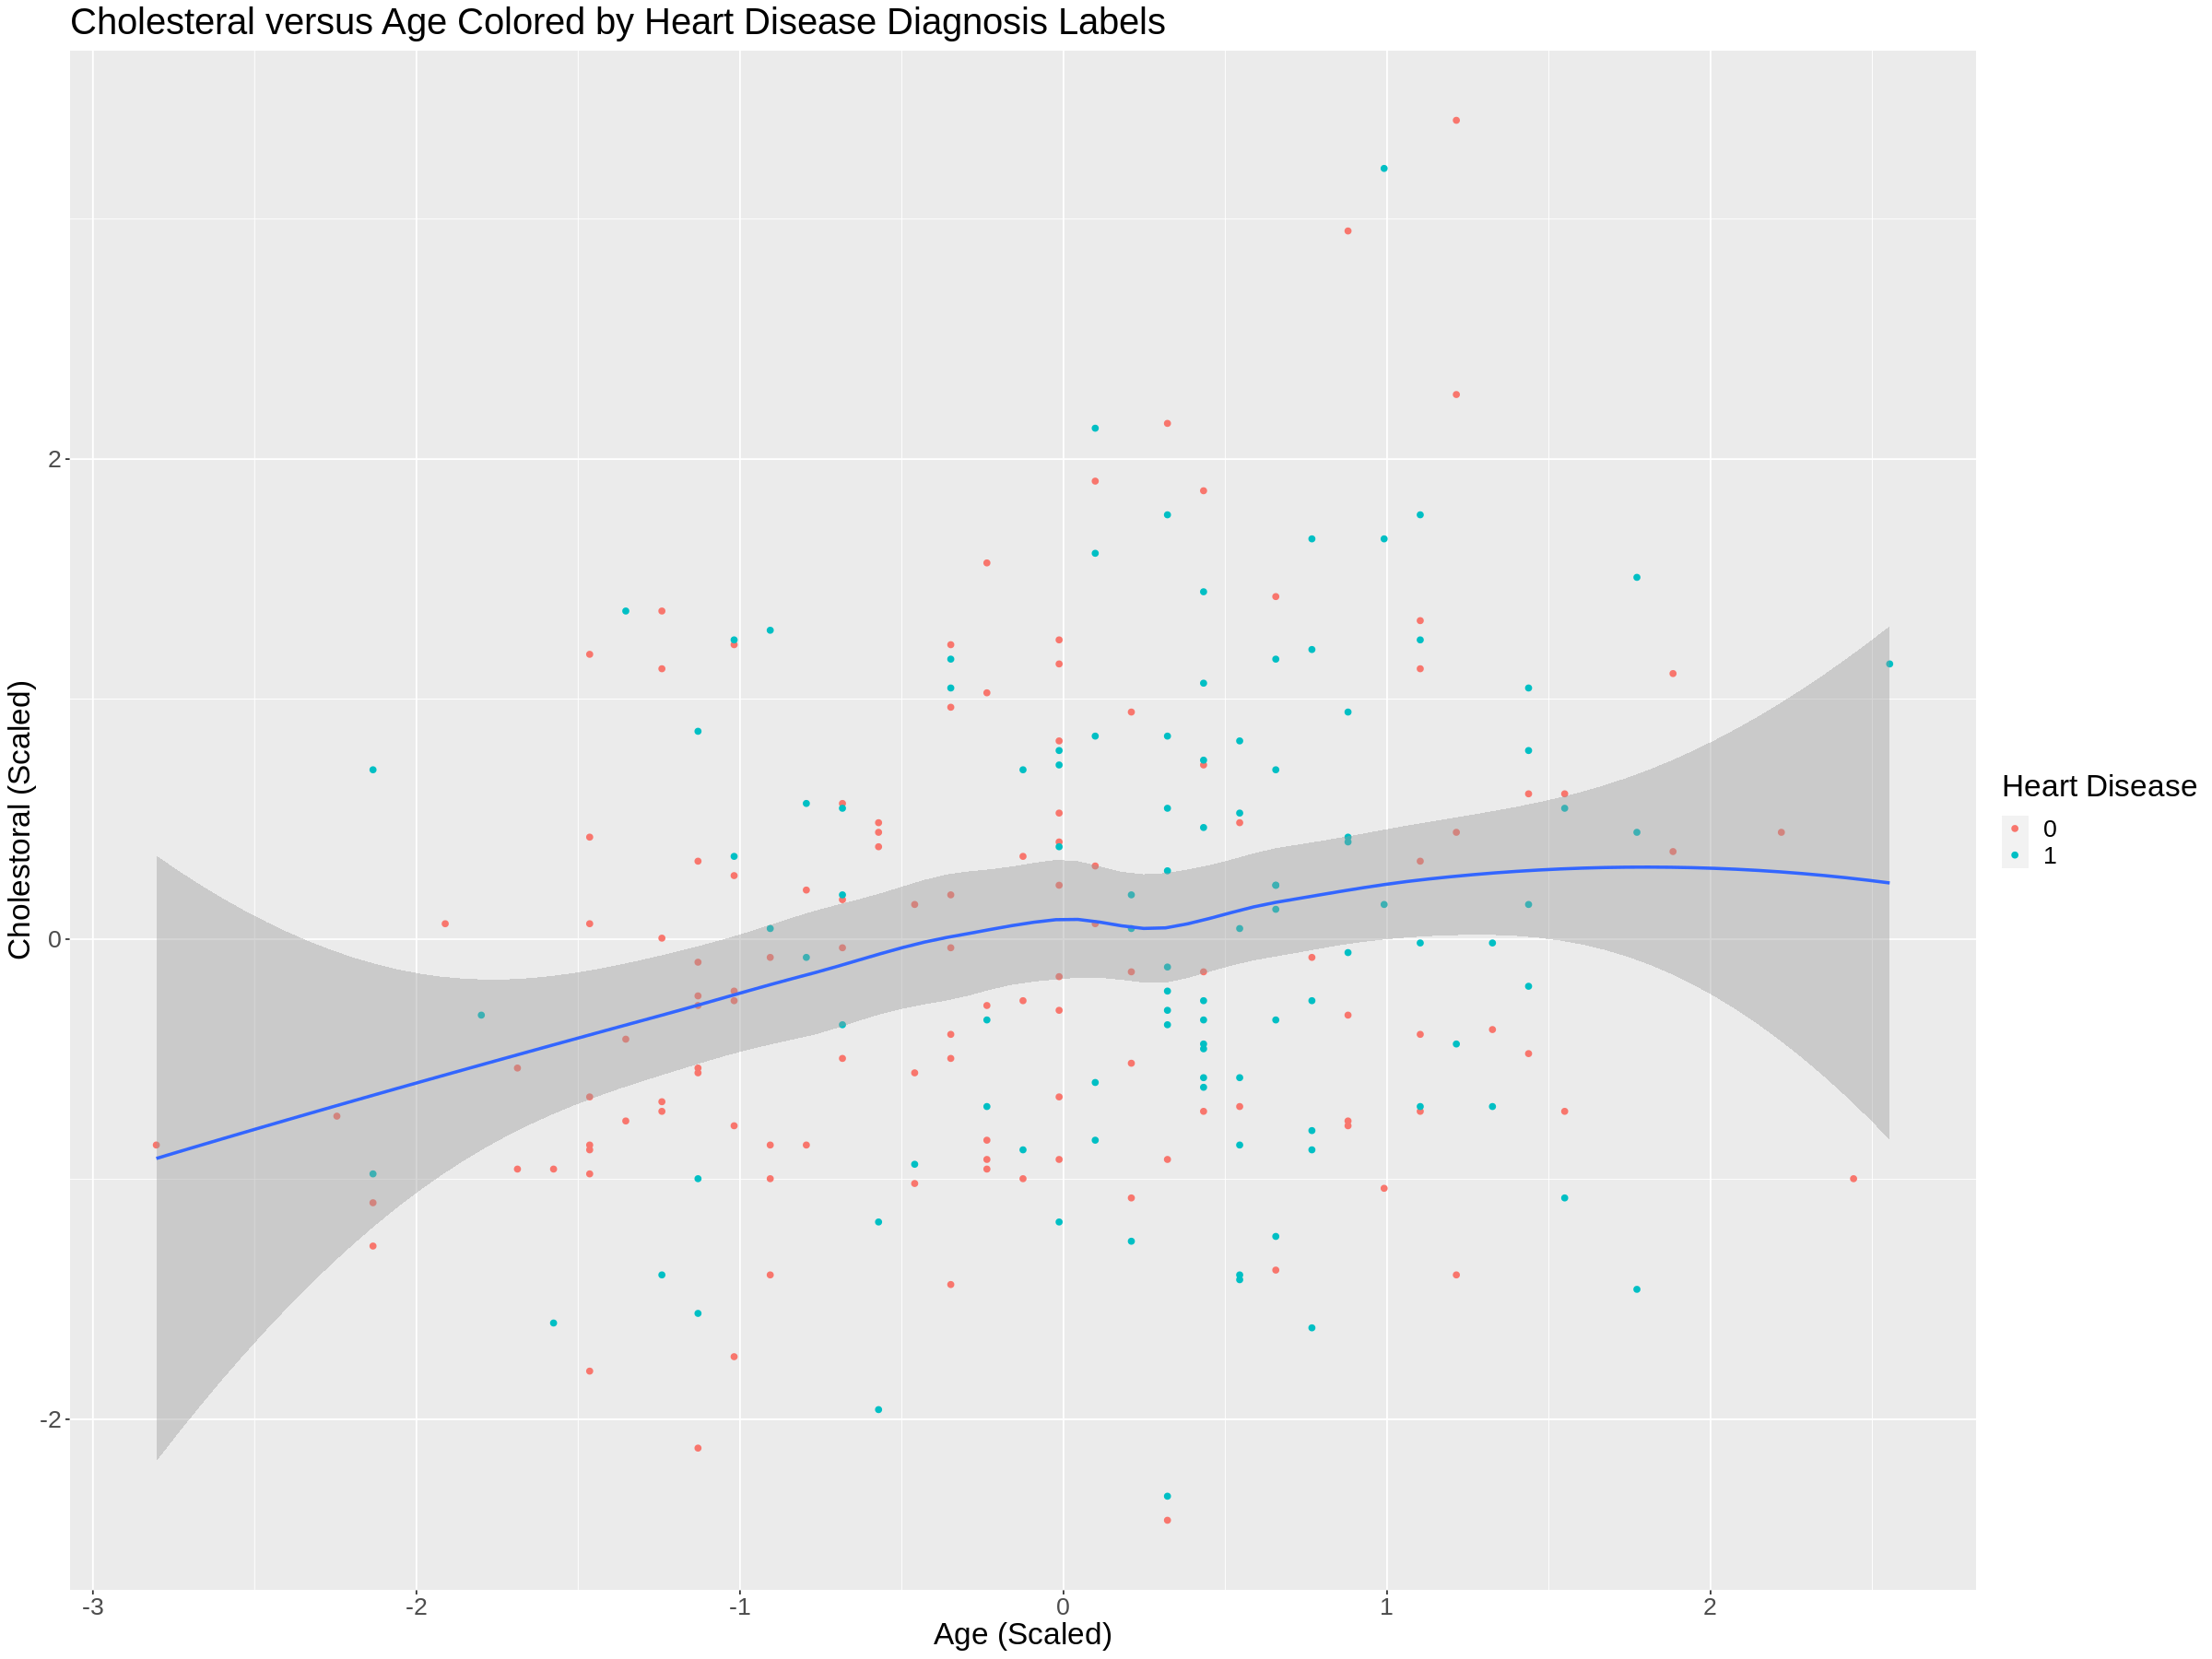

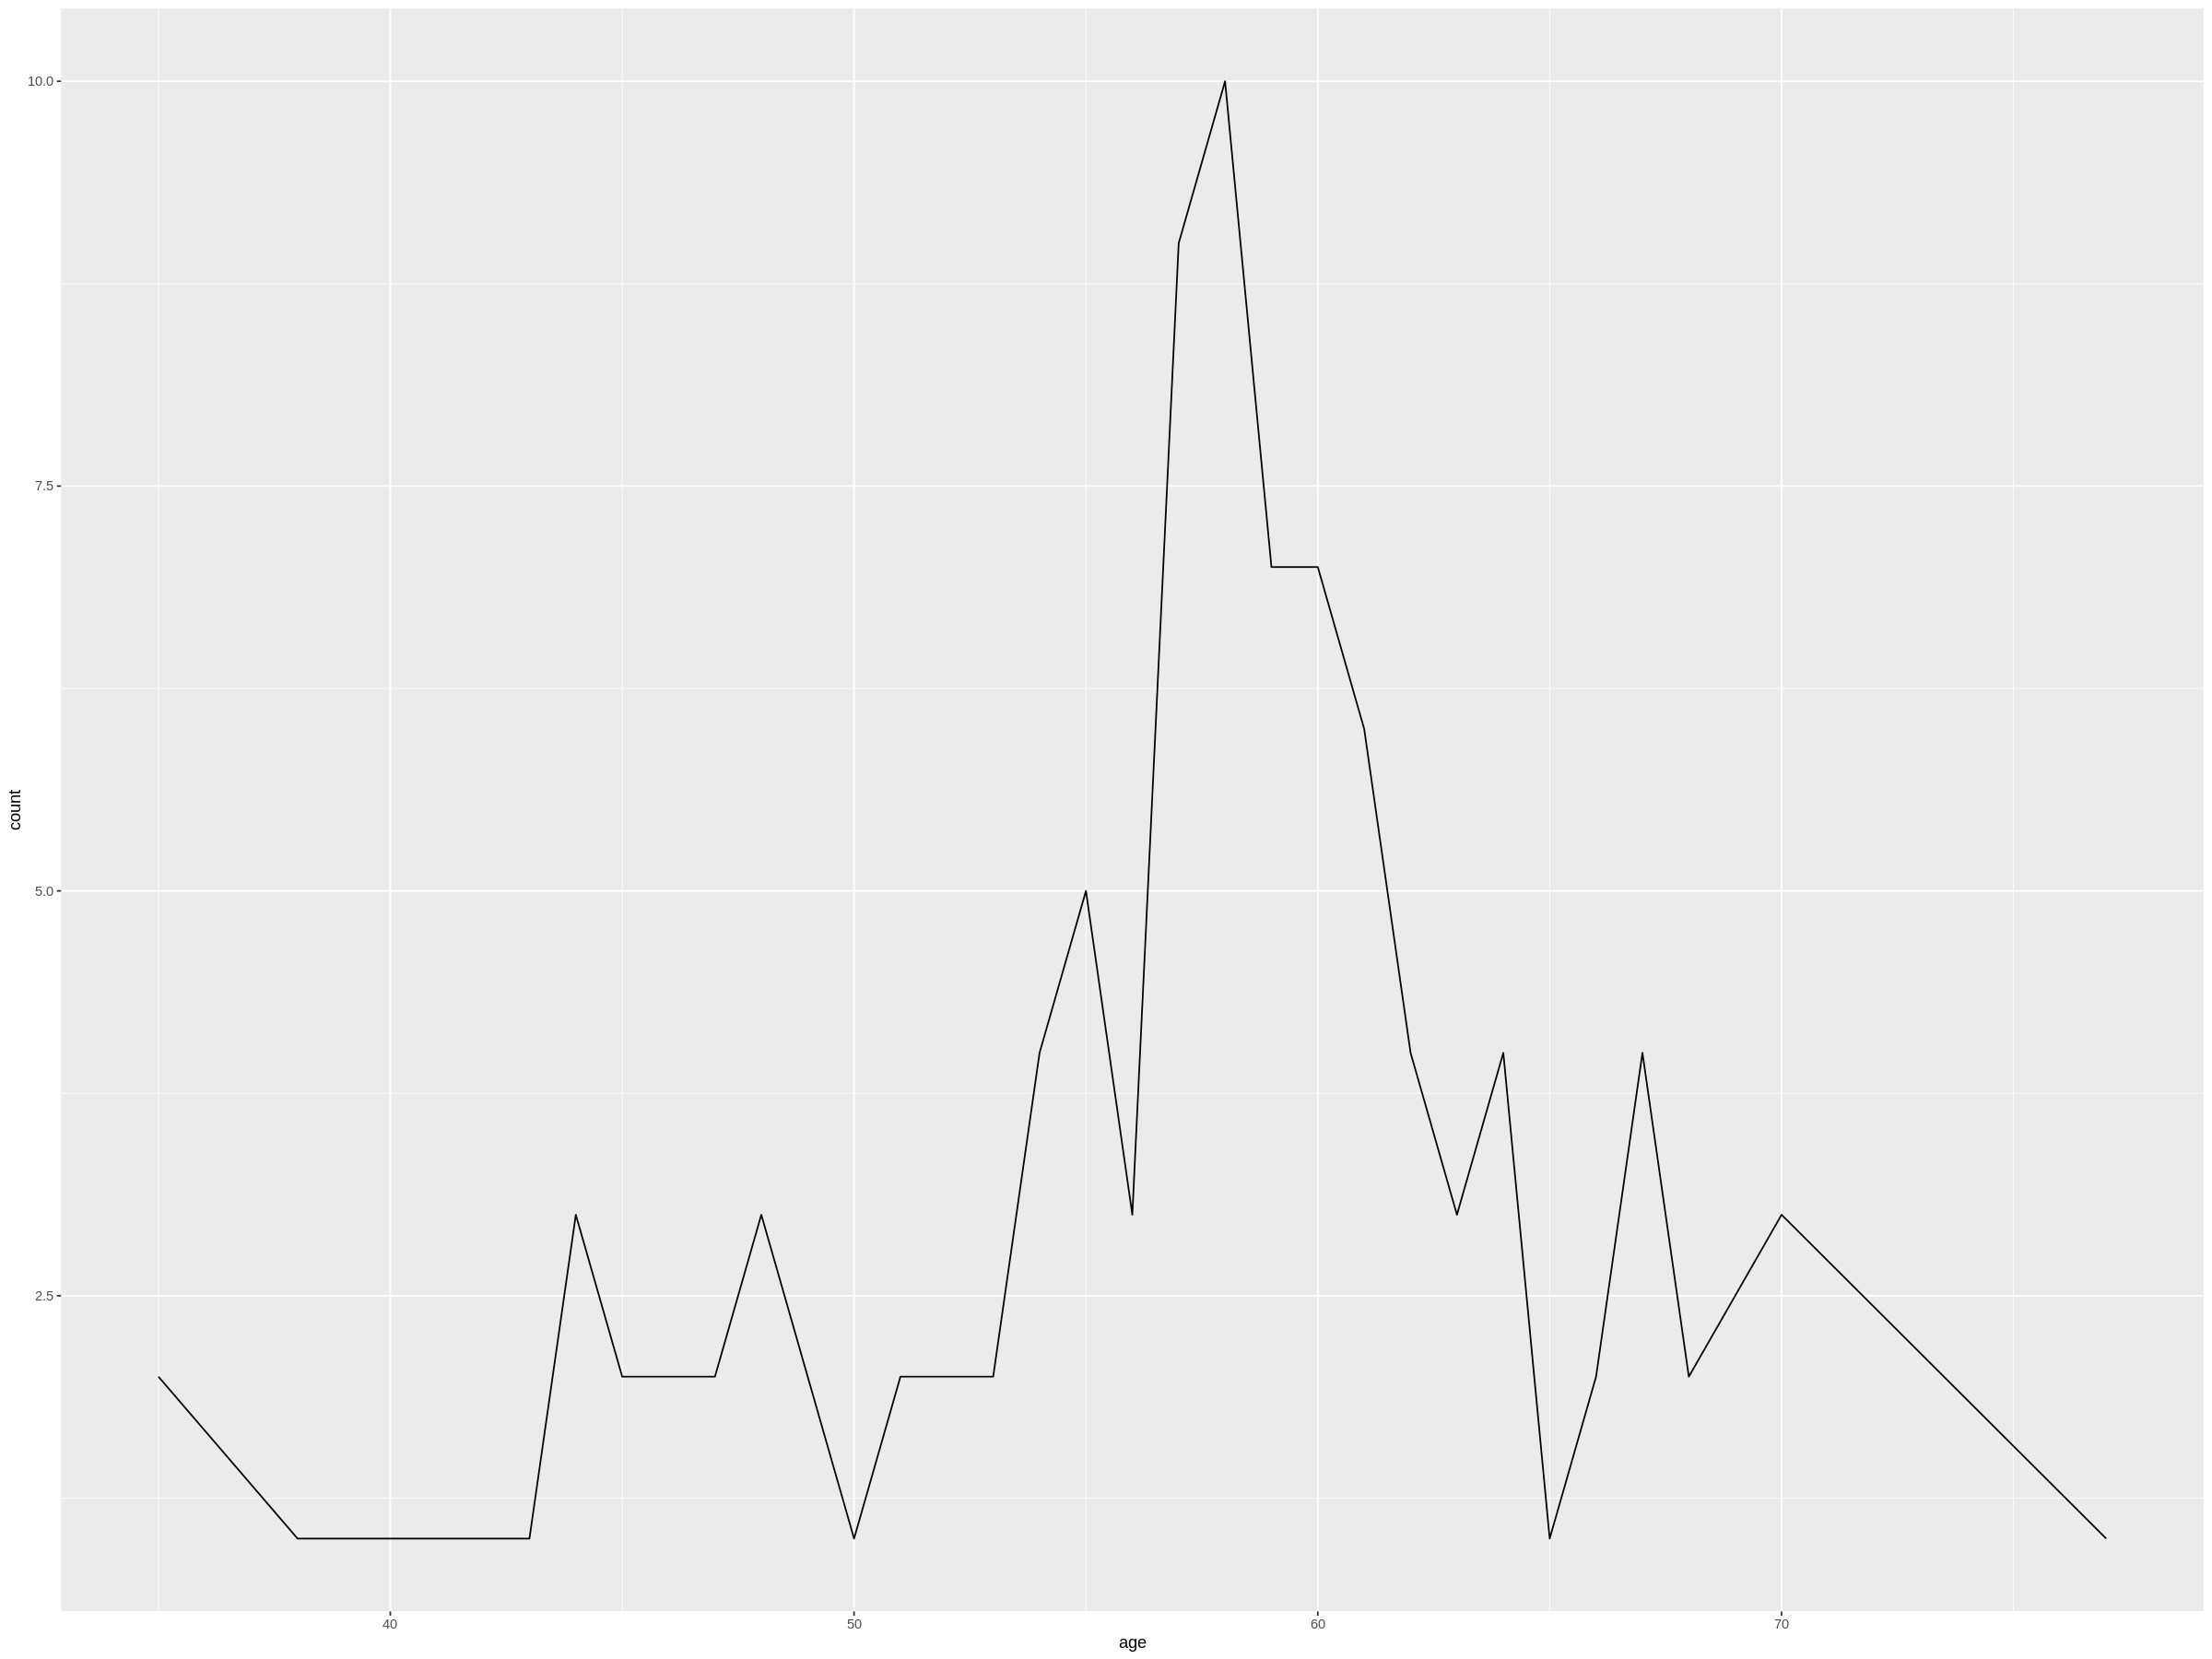

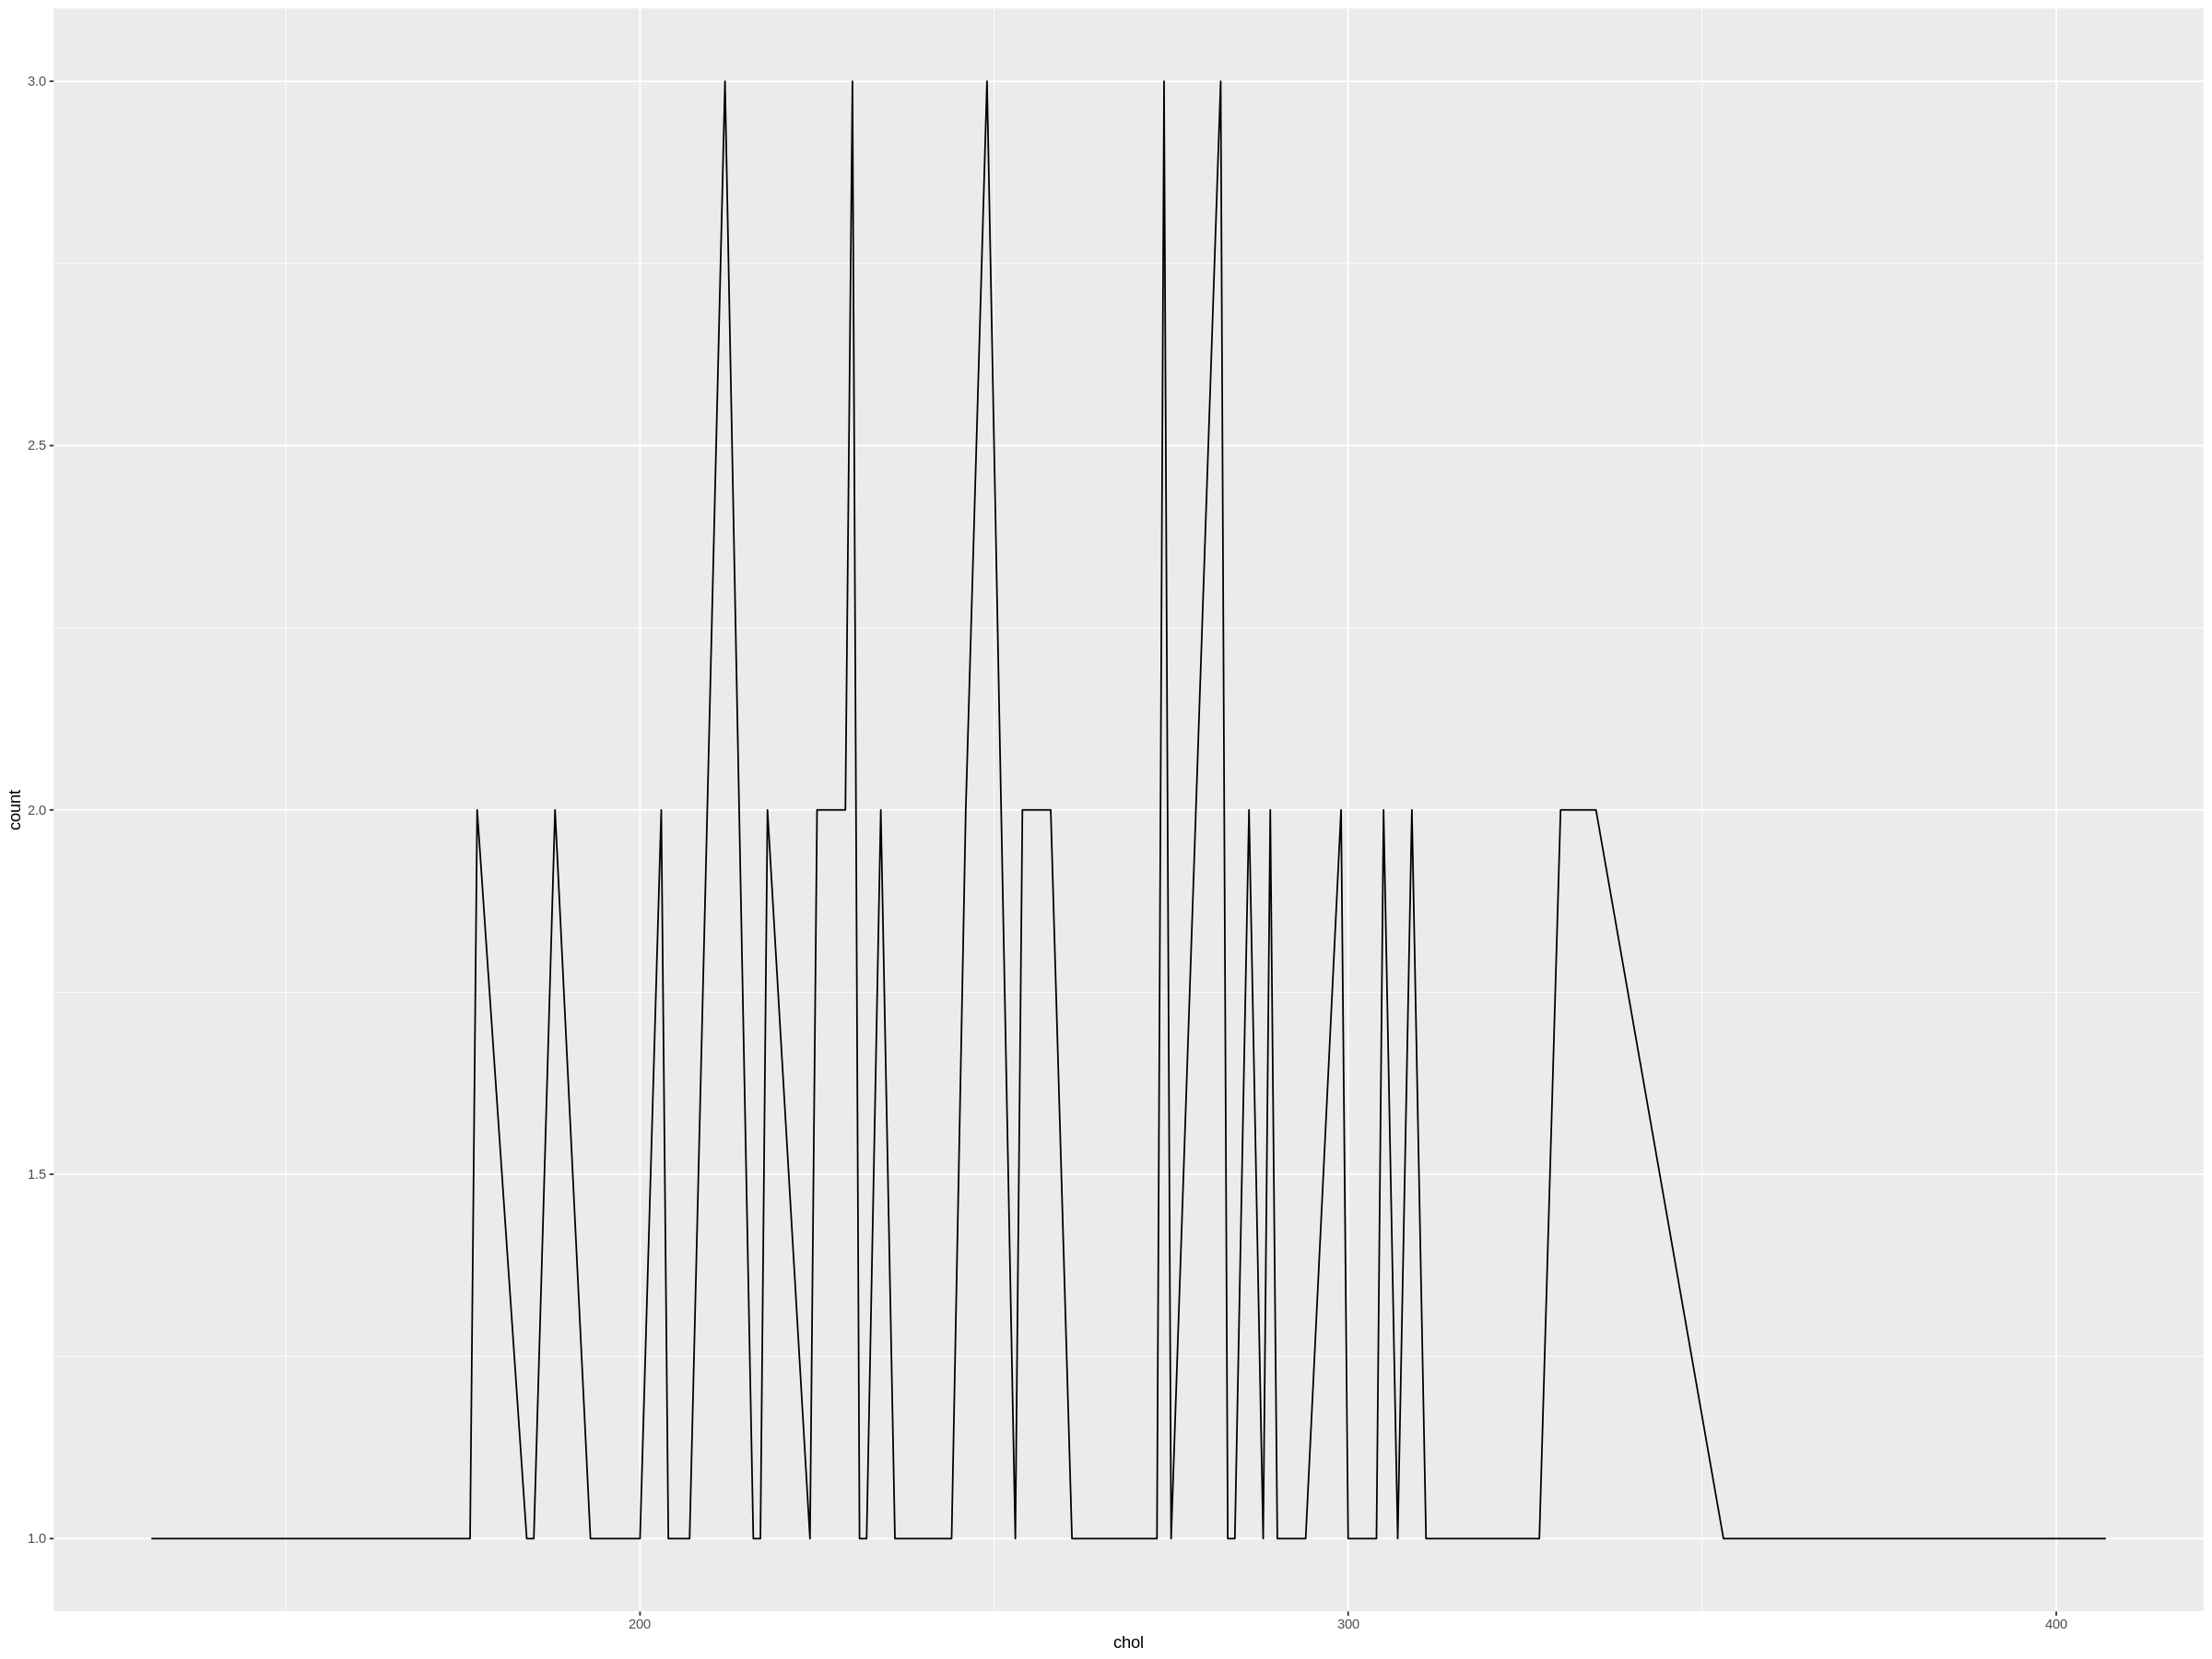

In [23]:
#Standardizing the variables

cleveland_recipe <- recipe(condition ~ age + chol, data = cleveland_train)|>
                    step_scale(all_predictors())|>
                    step_center(all_predictors())
cleveland_scaled <- cleveland_recipe|>
                    prep()|>
                    bake(cleveland_train)
#Creating a scatter plot
options(repr.plot.width=20, repr.plot.height=15)


age_cholestoral_disease_plot <- cleveland_scaled|> 
                  ggplot(aes(x= age, y= chol))+
                  geom_point(aes(color = condition))+
                  geom_smooth()+
                  labs(x = "Age (Scaled)", y = "Cholestoral (Scaled)", color = "Heart Disease")+
                  theme(text = element_text(size = 20))+
                  ggtitle("Cholesteral versus Age Colored by Heart Disease Diagnosis Labels")
age_cholestoral_disease_plot

#Draft plots for exploratory p, no labels yet
age_disease_plot<- age_disease_data|>
                    ggplot(aes(x = age, y = count))+
                    geom_line()
age_disease_plot
chol_disease_plot <- cholestoral_disease_data |>
                      ggplot(aes(x = chol, y = count))+
                        geom_line()
chol_disease_plot 

#Problem with these: we don't know how many people are there in a age group.

## **Methods**

### Data Analysis

To solve this classification problem, we will use the K-nearest neighbours algorithm. First, the data will be shuffled and stratified before being randomly split into training and testing data. Then the variables age, cholesterol levels, and resting heart rate will all be scaled and used as predictors to classify into the ```condition``` variable. To determine the optimal number of neighbours, we will use 5-fold cross-validation with a range of ```K``` values and then visualize the estimated accuracy against the number of neighbours and select the value with the greatest estimated accuracy. Finally, we will use our completed model to make predictions for the testing data, compare those with the true values, and then critically analyze our performance using the confusion matrix and accuracy.

### Visualization of results

Since we are attempting to classify for heart disease, a false negative would be far more consequential than a false positive. Thus, it is crucial to understand the types of errors the model is making, and either a confusion matrix heat map or a bar graph displaying the proportion of correct answers to incorrect answers split by the condition value would work as both would display the accuracy as well as the nature of errors.

## **Expected Outcomes and Significance**


### What do you expect to find?

Initially, we expect to find if there exists any sort of relationship between age and cholesterol level which affects the likelihood of a patient having heart disease.  After exploring the possibility of a relationship between age/cholesterol level and heart disease, we plan to discover whether we can accurately predict whether a patient will have a heart disease through descriptive and exploratory data analysis.

### What impact could such findings have?

Discovering whether we can accurately predict whether someone will/will not have heart disease from testing/training data will establish a huge medical impact globally; people who have received the news of early detection of heart disease can be treated earlier and expect to live a near-normal life expectancy.

### What future questions could this lead to?

If such an algorithm is discovered, this will lead to the exploration of whether we can predict other medical diseases accurately with both classification and regression-based approaches. Questions of predicting other diseases such as Measles or the Flu based on underlying health conditions will also arise.